In [1]:
from src.solvers import EvolutionaryAlgorithm, PathRepresentation
from Problem import Problem

Cost: $d + (d \cdot \alpha \cdot w)^\beta$

In [2]:
problem = Problem(10, density=1.0, alpha=1, beta=2, seed=42)

problem_rep = PathRepresentation(problem)

In [3]:
from src.solvers import SelectionMethods
from functools import partial

algorithm = EvolutionaryAlgorithm(
    problem_rep=problem_rep,
    population_size=50,
    offspring_size=30,
    selection_method=partial(SelectionMethods.tournament_selection, tournament_size=10)
)

Initializing population:   0%|          | 0/50 [00:00<?, ?it/s]

Initializing population: 100%|██████████| 50/50 [00:00<00:00, 234.21it/s]


In [4]:
last_pop, history = algorithm.solve(num_generations=50, mutation_rate=0.3)

Evolving: 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]


In [ ]:
def conversion(best, rep):
    """Convert EA solution (list of trips) to the required flat path format."""
    path = []
    for trip in best.genotype:
        current = 0
        for city, gold in trip:
            sp = rep.sp_path(current, city)
            for node in sp[1:-1]:
                if node == 0:
                    path.append((0, 0))  # implicit unload
                else:
                    path.append((node, 0))
            path.append((city, gold))
            current = city
        sp = rep.sp_path(current, 0)
        for node in sp[1:-1]:
            if node == 0:
                path.append((0, 0))
            else:
                path.append((node, 0))
        path.append((0, 0))
    return path

flatten_path = conversion(last_pop[0], problem_rep)

In [7]:
import networkx as nx
def is_valid(path, p:Problem):
    for (c1, gold1), (c2, gold2) in zip(path, path[1:]):
        if not nx.has_path(p.graph, c1, c2):
            return False
    return True 

print("Is valid path?", is_valid(flatten_path, problem))

Is valid path? True


Best solution: 9066.159397859132
baseline 544978.878527408


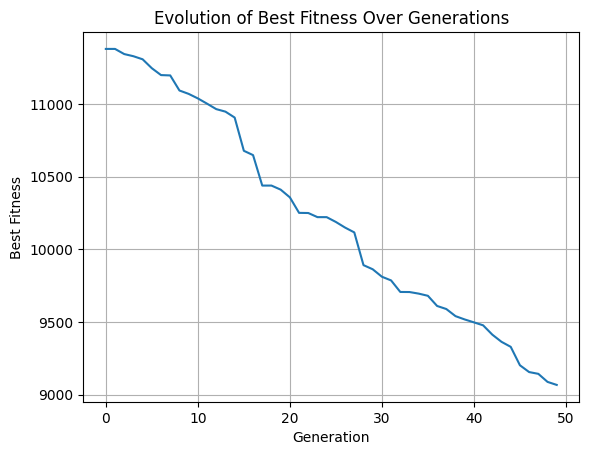

In [8]:
print("Best solution:", last_pop[0].fitness)
print("baseline", problem.baseline())
algorithm.plot(history)

In [16]:
algorithm.validate_solution(last_pop[0].genotype)

Total gold — expected: 493281.59, actual: 493281.59, match: True


True

In [17]:
configs = [
    # (num_cities, density, alpha, beta)
    (100, 0.2, 1, 1),
    (100, 0.2, 2, 1),
    (100, 0.2, 1, 2),
    (100, 1.0, 1, 1),
    (100, 1.0, 2, 1),
    (100, 1.0, 1, 2),
    (1000, 0.2, 1, 1),
    (1000, 0.2, 2, 1),
    (1000, 0.2, 1, 2),
    (1000, 1.0, 1, 1),
    (1000, 1.0, 2, 1),
    (1000, 1.0, 1, 2),
]

results = []

for n, d, a, b in configs:
    print(f"\n{'='*60}")
    print(f"  n={n}, density={d}, α={a}, β={b}")
    print(f"{'='*60}")

    problem = Problem(n, density=d, alpha=a, beta=b)
    baseline = problem.baseline()
    print(f"Baseline: {baseline:.2f}")

    rep = PathRepresentation(problem)

    # choose generations
    if b > 1:
        gens = 5
    elif n >= 1000:
        gens = 200
    else:
        gens = 500

    ea = EvolutionaryAlgorithm(
        problem_rep=rep,
        population_size=50,
        offspring_size=30,
        selection_method=SelectionMethods.tournament_selection
    )

    pop, history = ea.solve(num_generations=gens, mutation_rate=0.3)
    best = pop[0].fitness
    improvement = (1 - best / baseline) * 100

    valid = ea.validate_solution(pop[0].genotype)

    print(f"Best:     {best:.2f}")
    print(f"Improvement: {improvement:.2f}%")
    print(f"Valid: {valid}")

    results.append({
        'n': n, 'density': d, 'alpha': a, 'beta': b,
        'baseline': baseline, 'best': best,
        'improvement': improvement, 'valid': valid,
        'generations': gens
    })

# summary table
print(f"\n{'='*90}")
print(f"{'n':>5} {'d':>5} {'α':>3} {'β':>3} {'gens':>5} {'baseline':>14} {'best':>14} {'improv%':>10} {'valid':>6}")
print(f"{'-'*90}")
for r in results:
    print(f"{r['n']:>5} {r['density']:>5} {r['alpha']:>3} {r['beta']:>3} "
          f"{r['generations']:>5} {r['baseline']:>14.2f} {r['best']:>14.2f} "
          f"{r['improvement']:>9.2f}% {str(r['valid']):>6}")


  n=100, density=0.2, α=1, β=1
Baseline: 25266.41


Evolving: 100%|██████████| 500/500 [00:21<00:00, 23.48it/s]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     25251.93
Improvement: 0.06%
Valid: True

  n=100, density=0.2, α=2, β=1
Baseline: 50425.31


Evolving: 100%|██████████| 500/500 [00:20<00:00, 24.43it/s]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     50412.51
Improvement: 0.03%
Valid: True

  n=100, density=0.2, α=1, β=2
Baseline: 5334401.93


Evolving: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     113729.51
Improvement: 97.87%
Valid: True

  n=100, density=1.0, α=1, β=1
Baseline: 18266.19


Evolving: 100%|██████████| 500/500 [00:11<00:00, 45.43it/s]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     18260.98
Improvement: 0.03%
Valid: True

  n=100, density=1.0, α=2, β=1
Baseline: 36457.92


Evolving: 100%|██████████| 500/500 [00:10<00:00, 46.27it/s]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     36454.41
Improvement: 0.01%
Valid: True

  n=100, density=1.0, α=1, β=2
Baseline: 5404978.09


Evolving: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Total gold — expected: 46632.07, actual: 46632.07, match: True
Best:     113654.60
Improvement: 97.90%
Valid: True

  n=1000, density=0.2, α=1, β=1
Baseline: 195402.96


Evolving: 100%|██████████| 200/200 [01:25<00:00,  2.34it/s]


Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     195399.87
Improvement: 0.00%
Valid: True

  n=1000, density=0.2, α=2, β=1
Baseline: 390028.72


Evolving: 100%|██████████| 200/200 [01:25<00:00,  2.33it/s]


Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     390027.65
Improvement: 0.00%
Valid: True

  n=1000, density=0.2, α=1, β=2
Baseline: 37545927.70


Evolving: 100%|██████████| 5/5 [01:15<00:00, 15.05s/it]


Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     802435.67
Improvement: 97.86%
Valid: True

  n=1000, density=1.0, α=1, β=1
Baseline: 192936.23


Evolving: 100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     192931.74
Improvement: 0.00%
Valid: True

  n=1000, density=1.0, α=2, β=1
Baseline: 385105.64


Evolving: 100%|██████████| 200/200 [00:55<00:00,  3.62it/s]


Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     385101.72
Improvement: 0.00%
Valid: True

  n=1000, density=1.0, α=1, β=2
Baseline: 57580018.87


Evolving: 100%|██████████| 5/5 [00:43<00:00,  8.64s/it]

Total gold — expected: 493281.59, actual: 493281.59, match: True
Best:     1211214.29
Improvement: 97.90%
Valid: True

    n     d   α   β  gens       baseline           best    improv%  valid
------------------------------------------------------------------------------------------
  100   0.2   1   1   500       25266.41       25251.93      0.06%   True
  100   0.2   2   1   500       50425.31       50412.51      0.03%   True
  100   0.2   1   2     5     5334401.93      113729.51     97.87%   True
  100   1.0   1   1   500       18266.19       18260.98      0.03%   True
  100   1.0   2   1   500       36457.92       36454.41      0.01%   True
  100   1.0   1   2     5     5404978.09      113654.60     97.90%   True
 1000   0.2   1   1   200      195402.96      195399.87      0.00%   True
 1000   0.2   2   1   200      390028.72      390027.65      0.00%   True
 1000   0.2   1   2     5    37545927.70      802435.67     97.86%   True
 1000   1.0   1   1   200      192936.23      1929